# HEALpix interpolation 

The objective of this notebook is to convert the ERA5 temperature data to a HEALpix grid. 


In [27]:
import intake
import matplotlib.pyplot as plt
import healpy as hp
#import cmocean
import xarray as xr
import numpy as np
from scipy.interpolate import NearestNDInterpolator
#import cartopy.crs as ccrs
#import cartopy.feature as cf
#import easygems.healpix as egh
#import cmocean

The first step to create the HEALpix grid is to select the resolution we want. for that, we should see the data available. 

In [29]:
#Open the data
ds=xr.open_dataset('data/01jan2023.nc')
ds=ds.isel(time=0)

In [3]:
df = ds.to_dataframe().reset_index()
df.columns = ['longitude', 'latitude', 'time', 'temperature']
df

,longitude,latitude,time,temperature
0,0.000,90.000,2023-01-01 09:00:00,258.276141
1,0.000,84.375,2023-01-01 09:00:00,260.621813
2,0.000,78.750,2023-01-01 09:00:00,271.178523
3,0.000,73.125,2023-01-01 09:00:00,274.150974
4,0.000,67.500,2023-01-01 09:00:00,273.754489
...,...,...,...,...
2107,354.375,-67.500,2023-01-01 09:00:00,271.605872
2108,354.375,-73.125,2023-01-01 09:00:00,260.266876
2109,354.375,-78.750,2023-01-01 09:00:00,252.246958
2110,354.375,-84.375,2023-01-01 09:00:00,251.087180


There are 360 longitude degrees, and 64 dimentions in the data: for longitude the resolution is of 5,6 degrees
There are 90 latitude degrees, and 33 dimentions in the data: for latitude the resolution is of 2,7 degrees

Given this configuration, we could conclude that the closest HEALpix resolution is the 4, and we could make it even to the 3 resolution. These resoltuions correpond to 16 and 32 nside respectively
(healix resolutions given by the following source https://lambda.gsfc.nasa.gov/toolbox/pixelcoords.html#pixelinfo)


In [4]:
#All following steps made with help of llama 3 70 B


lat = df.latitude
lon = df.longitude
t = df.temperature

#Here we define the characterstics of the HEALpix grid

nside = 16
npix = hp.nside2npix(nside)

theta = np.radians(90 - lat) 
phi = np.radians(lon)

pix = hp.ang2pix(nside, theta, phi)

In [5]:
#This function uses a simple Nearest-neighbor interpolation
interp = NearestNDInterpolator(np.column_stack((theta, phi)), t)

In [6]:
#We create the HEALpix grid and interpolate using the previus function

hp_grid = np.arange(npix)
theta_hp, phi_hp = hp.pix2ang(nside, hp_grid)

temp_hp = interp(np.column_stack((theta_hp, phi_hp)))

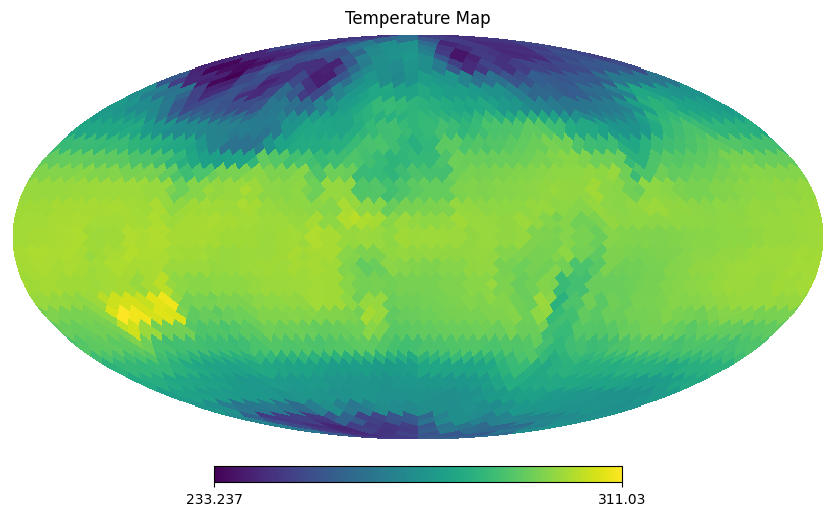

In [ ]:

# Plot the map
hp.mollview(temp_hp, title='Temperature Map', cmap='viridis')
plt.show()

We can see a good resolution of the data, and it makes sense that the poles are colder. in a future process, we could map also the coastile (It was tried, but no solution was found)